In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

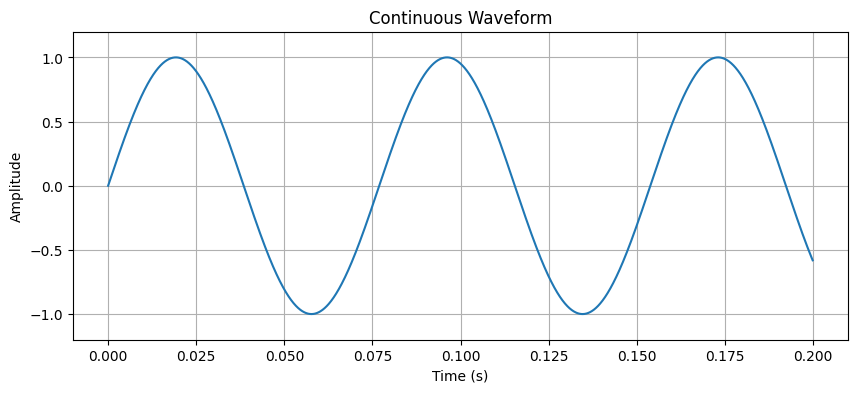

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf

fs_cont = 10e3 #Hz
ts_cont = 1 / fs_cont
n_cont = np.arange(0, 2000)
fd = 13 #Hz

x_cont = n_cont/fs_cont
y_cont = np.sin(2*np.pi*fd*ts_cont*n_cont)

hf.plot_timeseries("Continuous Waveform",
                   [x_cont], [y_cont],
                   ['continuous'])



## 2. Quantization

Sampling is the process of converting an analog waveform to digital waveform by using the regular sampling period.

Quantization is the process of mapping each sample of digital wave to discrete set of possible amplitude levels.

### 2.1 Resolution and levels

An ADC performs quantization using $N$ bits of resolution, can have $2^N$ different levels.

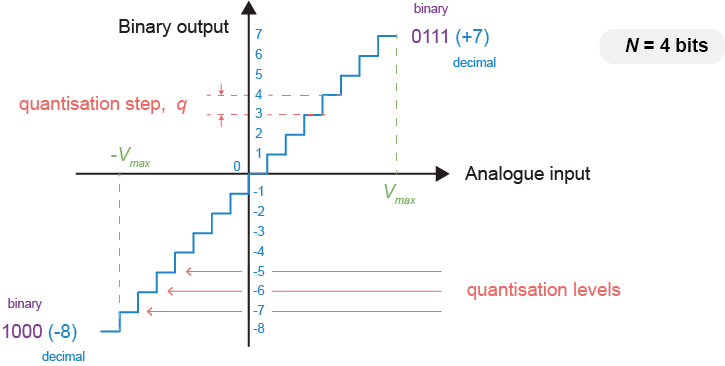

We can obtain the quantization step $q$,

$$
    q = \frac{{V_\text{max}}}{2^{N-1}}
$$

For a 4 bit quantizer, with $V_\text{max} = 1 $,

In [10]:
Vmax = 1
N  = 4
q  = Vmax/(2**(N-1))
levels = np.arange(-1, 1, q)

print('Quantisation levels for 4 bits:')
for idx, level in enumerate(levels):
    print('Decimal: ', idx-2**(N-1), ' |  Discrete Level: ', level)

Quantisation levels for 4 bits:
Decimal:  -8  |  Discrete Level:  -1.0
Decimal:  -7  |  Discrete Level:  -0.875
Decimal:  -6  |  Discrete Level:  -0.75
Decimal:  -5  |  Discrete Level:  -0.625
Decimal:  -4  |  Discrete Level:  -0.5
Decimal:  -3  |  Discrete Level:  -0.375
Decimal:  -2  |  Discrete Level:  -0.25
Decimal:  -1  |  Discrete Level:  -0.125
Decimal:  0  |  Discrete Level:  0.0
Decimal:  1  |  Discrete Level:  0.125
Decimal:  2  |  Discrete Level:  0.25
Decimal:  3  |  Discrete Level:  0.375
Decimal:  4  |  Discrete Level:  0.5
Decimal:  5  |  Discrete Level:  0.625
Decimal:  6  |  Discrete Level:  0.75
Decimal:  7  |  Discrete Level:  0.875


### 2.2 Sampling of the waveform without using quantzation

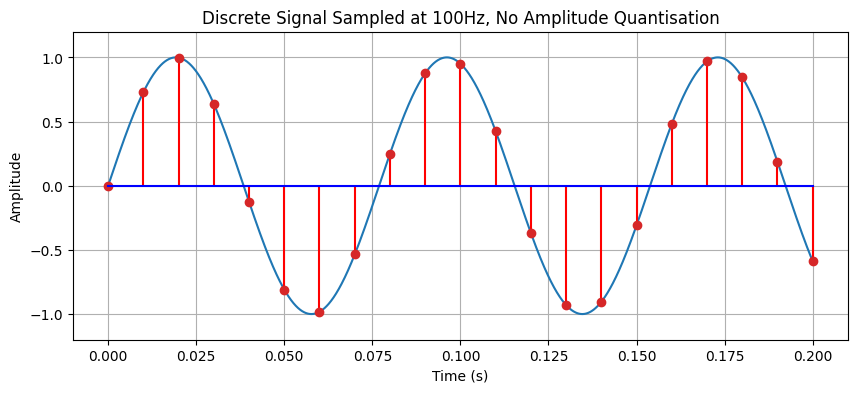

In [3]:
# Set sampling parameters
fs = 100 #Hz
ts = 1/fs
n  = np.arange(0, 21)

# Perform sampling process
x = n/fs
y = np.sin(2*np.pi*fd*ts*n)

# And plot
hf.plot_timeseries("Discrete Signal Sampled at 100Hz, No Amplitude Quantisation",
                   [x_cont, x], [y_cont, y],
                   ['continuous', 'discrete'])

### 2.3 Sampling of the waveform using 4 bit quantizer

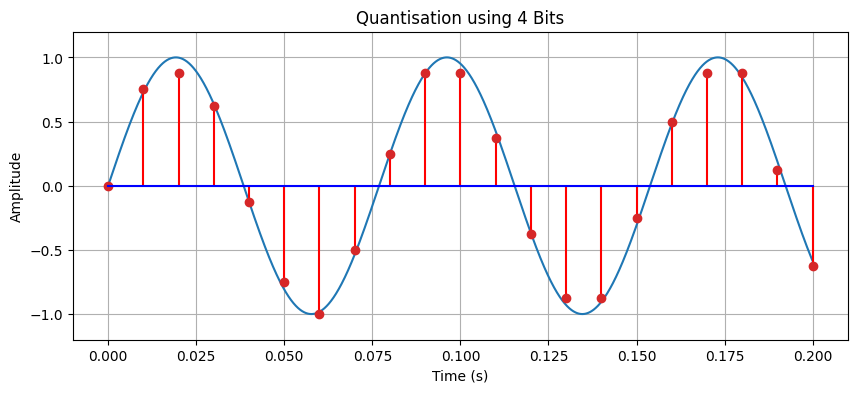

In [4]:
# Perform quantisation (4 bits)
yq4 = np.zeros(np.size(y))
N  = 4
q4  = 1/(2**(N-1))
levels = np.arange(-1, 1, q4)
for idx, sample in enumerate(y):
    # https://stackoverflow.com/questions/12141150
    yq4[idx] = min(levels, key=lambda x:abs(x-sample))

hf.plot_timeseries("Quantisation using 4 Bits",
                   [x_cont, x], [y_cont, yq4],
                   ['continuous', 'discrete'])

### 2.4 Sampling of the waveform using 6 bit quantizer

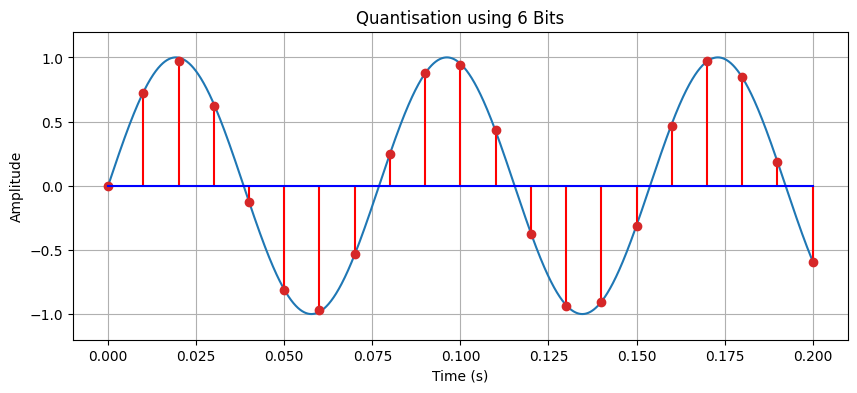

In [5]:
# Perform quantisation (6 bits)
yq6 = np.zeros(np.size(y))
N  = 6
q6  = 1/(2**(N-1))
levels = np.arange(-1, 1, q6)
for idx, sample in enumerate(y):
    yq6[idx] = min(levels, key=lambda x:abs(x-sample))

hf.plot_timeseries("Quantisation using 6 Bits",
                   [x_cont, x], [y_cont, yq6],
                   ['continuous', 'discrete'])

### 2.5 Dynamic Range

We can compute the Dynamic Range of an $N$-bit converter as follows.

$$
\text{Dynamic Range} = 20\text{log}_{10}(2^N)=20N\text{log}_{10}(2)=6.02N
$$

In [6]:
N_vec = np.arange(2, 17, 1)
DR_vec = N_vec * 6.02
for idx, DR in enumerate(DR_vec):
    print('Number of bits: ', N_vec[idx], ' | Dynamic Range (dB): ', np.round(DR))

Number of bits:  2  | Dynamic Range (dB):  12.0
Number of bits:  3  | Dynamic Range (dB):  18.0
Number of bits:  4  | Dynamic Range (dB):  24.0
Number of bits:  5  | Dynamic Range (dB):  30.0
Number of bits:  6  | Dynamic Range (dB):  36.0
Number of bits:  7  | Dynamic Range (dB):  42.0
Number of bits:  8  | Dynamic Range (dB):  48.0
Number of bits:  9  | Dynamic Range (dB):  54.0
Number of bits:  10  | Dynamic Range (dB):  60.0
Number of bits:  11  | Dynamic Range (dB):  66.0
Number of bits:  12  | Dynamic Range (dB):  72.0
Number of bits:  13  | Dynamic Range (dB):  78.0
Number of bits:  14  | Dynamic Range (dB):  84.0
Number of bits:  15  | Dynamic Range (dB):  90.0
Number of bits:  16  | Dynamic Range (dB):  96.0


### 2.6 Noise

A Probability Density Function (PDF) denoted as $p(e)$ can be formed as

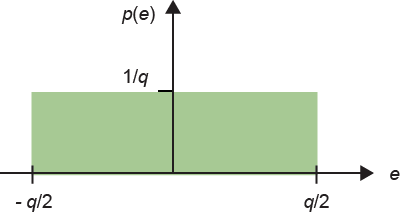

A technique known as dithering can be used to break-up periodic noise components in a quantised signal.

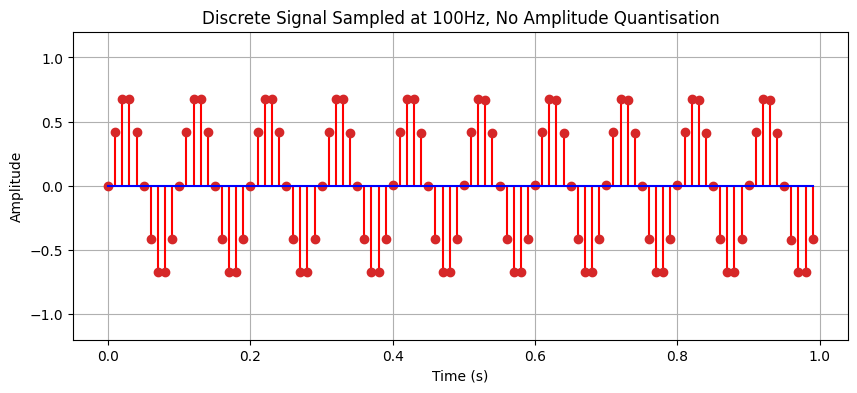

In [7]:
# Set sampling parameters
fs = 100 #Hz
ts = 1/fs
L  = 2048
n  = np.arange(0, L)
fd = 10.001

# Perform sampling process
x = n/fs
y = 0.7071*np.sin(2*np.pi*fd*ts*n)

# And plot
hf.plot_timeseries("Discrete Signal Sampled at 100Hz, No Amplitude Quantisation",
                   [x[0:100]], [y[0:100]],
                   ['discrete'])

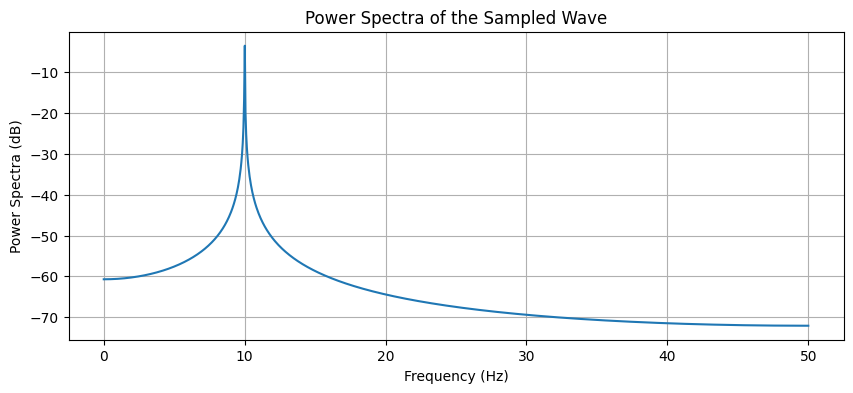

In [8]:
Y = np.fft.fft(y)
Y_norm = np.abs(Y)*2/L
Y_log = 20*np.log10(Y_norm)

fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(1, 1, 1)
axes.plot(n[0:L//2+1]*fs/L, Y_log[0:L//2+1])
axes.set_title('Power Spectra of the Sampled Wave')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Power Spectra (dB)')
axes.grid(True, 'Major')

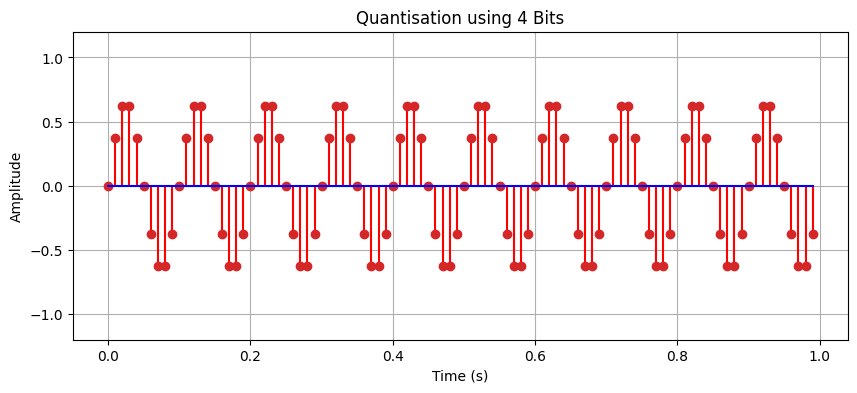

In [9]:
yq4 = np.zeros(np.size(y))
N   = 4
q4  = 1/(2**(N-1))
levels = np.arange(-1, 1, q4)
for idx, sample in enumerate(y):
    # https://stackoverflow.com/questions/12141150
    yq4[idx] = min(levels, key=lambda x:abs(x-sample))
    
hf.plot_timeseries("Quantisation using 4 Bits",
                   [x[0:100]], [yq4[0:100]],
                   ['discrete'])

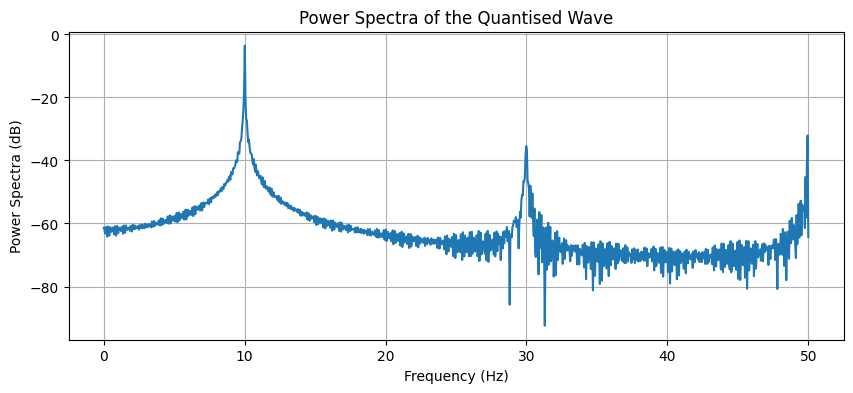

In [10]:
import matplotlib.pyplot as plt

Yq4 = np.fft.fft(yq4)
Yq4_norm = np.abs(Yq4)*2/L
Yq4_log = 20*np.log10(Yq4_norm)

fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(1, 1, 1)
axes.plot(n[0:L//2+1]*fs/L, Yq4_log[0:L//2+1])
axes.set_title('Power Spectra of the Quantised Wave')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Power Spectra (dB)')
axes.grid(True, 'Major')

In [11]:
noise_power = (q4**2)/12
noise_power

0.0013020833333333333

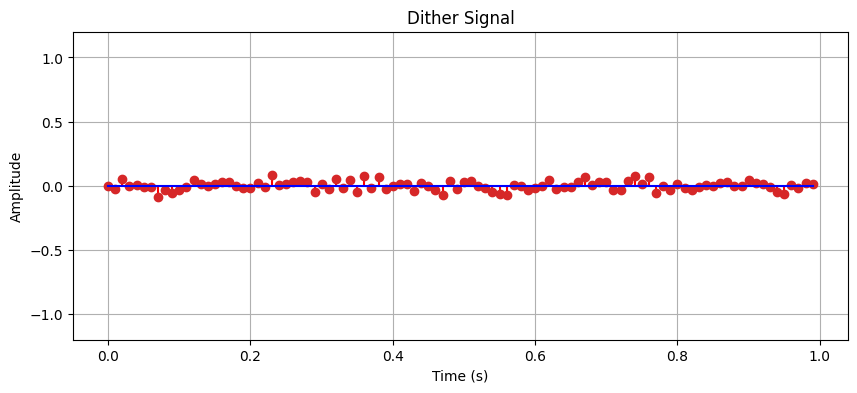

In [12]:
dither = np.random.normal(0,np.sqrt(noise_power),L)

hf.plot_timeseries("Dither Signal",
                   [x[0:100]], [dither[0:100]],
                   ['discrete'])

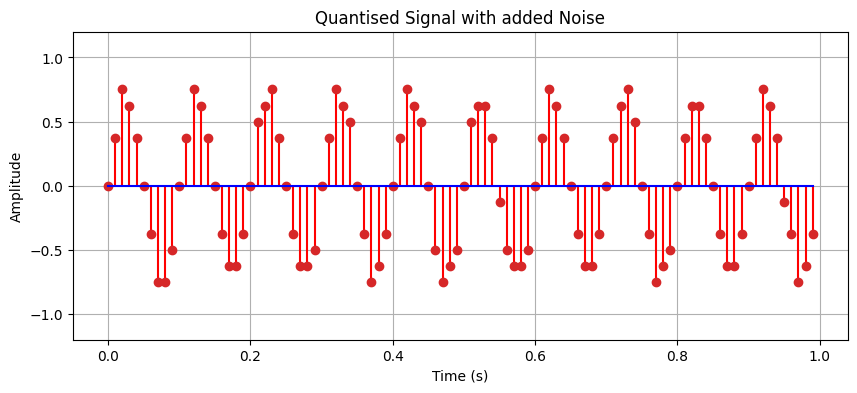

In [13]:
yd = y+dither

yq4d = np.zeros(np.size(y))
for idx, sample in enumerate(yd):
    # https://stackoverflow.com/questions/12141150
    yq4d[idx] = min(levels, key=lambda x:abs(x-sample))

hf.plot_timeseries("Quantised Signal with added Noise",
                   [x[0:100]], [yq4d[0:100]],
                   ['discrete'])

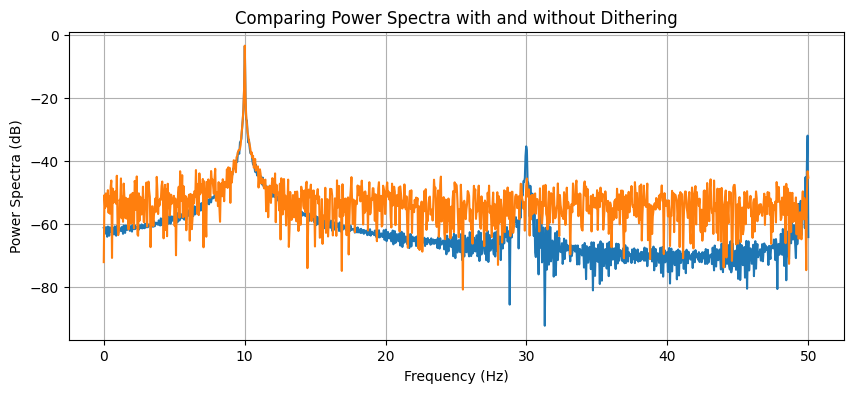

In [14]:
Yq4d = np.fft.fft(yq4d)
Yq4d_norm = np.abs(Yq4d)*2/L
Yq4d_log = 20*np.log10(Yq4d_norm)

fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(1, 1, 1)
axes.plot(n[0:L//2+1]*fs/L, Yq4_log[0:L//2+1])
axes.plot(n[0:L//2+1]*fs/L, Yq4d_log[0:L//2+1])
axes.set_title('Comparing Power Spectra with and without Dithering')
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Power Spectra (dB)')
axes.grid(True, 'Major')